In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
class NN():
    
    def __init__(self, n_input, n_hidden, n_output):
        
        self.weights, self.biases = [],[]
        self.layer_val, self.layer_err = [],[]
        self.errors = []
        for i in range(len(n_hidden)+1):
            if(i==0):
                self.weights.append(np.zeros((n_input,n_hidden[i])))
            elif(i==len(n_hidden)):
                self.weights.append(np.zeros((n_hidden[-1],n_output)))
            else:
                self.weights.append(np.zeros((n_hidden[i-1],n_hidden[i])))
            self.biases.append(np.zeros((1)))
    
    # Activation functions and their derivatives
    def relu(self, x):
        return x*(x>0)
    
    def reluDerivative(self, x):
        return 1.*(x>0)
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoidDerivative(self, x):
        return x*(x-1)
    
    def softmax(self, X):
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps)
    
    def softmaxDerivative(self, s):
        s = s.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)
    
    # Weight and bias initializers
    def initialize_weights(self):
        
        for i in range(len(self.weights)):
            self.weights[i] = np.random.uniform(low=0, high=5, size=self.weights[i].shape)
            
    def initialize_biases(self):
        
        for i in range(len(self.biases)):
            self.biases[i] = np.random.uniform(low=0, high=5, size=self.biases[i].shape)
    
    def plot_weights(self):
        
        for i in range(len(self.weights)):
            print(self.weights[i])
            print(self.biases[i])
            print(self.weights[i].shape, self.biases[i].shape, "\n\n\n")
    
    # forward pass
    def forward(self, inputs):
        
        self.layer_val, self.layer_err = [],[]
        for i in range(len(self.weights)):
            if(i==0):
                val = np.reshape(self.relu(np.matmul(inputs,self.weights[i])), (-1, self.weights[i].shape[1]))
            else:
                val = np.reshape(self.relu(np.matmul(val,self.weights[i])), (-1, self.weights[i].shape[1]))
            print("layer ",i," value ",val,"\n")
            self.layer_val.append(val)
        return val
    
    # backward pass
    def backward(self, inputs, outputs, lr=0.001):
        
        l = len(self.layer_val)-1
        for i in range(l,-1,-1):
            if(i == l):
                err = np.reshape(outputs-self.layer_val[i], (-1,outputs.shape[0]))
                err_delta = err * self.reluDerivative(self.layer_val[i])
                self.errors.append(np.mean(np.abs(err)))
            else:
                err_delta = self.reluDerivative(self.layer_err[l-(i+1)].dot(self.weights[i+1].T))
            self.layer_err.append(err_delta)
        for i in range(l,0,-1):
            print(self.layer_val[i-1].shape, self.layer_err[l-i].shape)
            self.weights[i] += lr * self.layer_val[i-1].T.dot(self.layer_err[l-i])
        self.weights[0] += lr * inputs[np.newaxis].T.dot(self.layer_err[l])

In [3]:
# parameter for model
in_dim = 1
out_dim = 1
hid_dim = [3,5,3]

In [4]:
# create model
c = NN(n_input=in_dim, n_hidden=hid_dim, n_output=out_dim)

In [5]:
# initialize weights and biases
c.initialize_weights()
c.initialize_biases()

In [6]:
# create data random
num_instances = 100
inputs =  np.random.randint(low=0, high=10, size=(num_instances,in_dim))
outputs = inputs * 10 + 3

In [7]:
inputs, outputs

(array([[6],
        [3],
        [0],
        [8],
        [1],
        [4],
        [6],
        [6],
        [9],
        [2],
        [0],
        [4],
        [5],
        [5],
        [2],
        [6],
        [0],
        [6],
        [4],
        [3],
        [4],
        [0],
        [8],
        [0],
        [4],
        [8],
        [1],
        [6],
        [6],
        [7],
        [9],
        [0],
        [2],
        [5],
        [3],
        [1],
        [9],
        [0],
        [0],
        [1],
        [2],
        [2],
        [6],
        [1],
        [3],
        [6],
        [6],
        [9],
        [6],
        [6],
        [4],
        [5],
        [7],
        [0],
        [2],
        [6],
        [5],
        [9],
        [6],
        [9],
        [9],
        [7],
        [7],
        [6],
        [5],
        [0],
        [9],
        [8],
        [1],
        [9],
        [8],
        [1],
        [1],
        [8],
        [5],
        [1],
        [3],

In [8]:
for i in range(10):
    print("-------------------------------------------------------------------------------")
    print("Epoch : ", i)
    print("-------------------------------------------------------------------------------")
    for index in range(inputs.shape[0]):
        out = c.forward(inputs[index])
        c.backward(inputs[index], outputs[index], lr=0.0001)
        print(c.errors[index], out)

-------------------------------------------------------------------------------
Epoch :  0
-------------------------------------------------------------------------------
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[7138.21148327]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
7075.211483269405 [[7138.21148327]]
layer  0  value  [[ 3.306253   13.11419318  8.20901939]] 

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 8.81667467 34.9

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 5.51042167 21.85698864 13.68169899]] 

layer  1  value  [[ 88.6848551   63.08775723 115.38425407  94.07244578  93.20636755]] 

layer  2  value  [[1425.3924682  1087.45590541 1313.26264996]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 207.69165733 169.3304024  167.77146159]] 

layer  2  value  [[2565.70644276 1957.42062974 2363.87276993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[ 8.81667467 34.97118182 21.89071838]] 

layer  1  value  [[141.89

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 4.40833733 17.48559091 10.94535919]] 

layer  1  value  [[70.94788408 50.47020578 92.30740326 75.25795662 74.56509404]] 

layer  2  value  [[1140.31397456  869.96472433 1050.61011997]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[ 3.306253   13.11419318  8.20901939]] 

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[ 4.40833733 17.48559091 10.945359

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 4.40833733 17.48559091 10.94535919]] 

layer  1  value  [[70.94788408 50.47020578 92.30740326 75.25795662 74.56509404]] 

layer  2  value  [[1140.31397456  869.96472

63.0 [[-0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 207.69165733 169.3304024  167.77146159]] 

layer  2  value  [[2565.70644276 1957.42062974 2363.87276993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 4.40833733 17.48559091 10.94535919]] 

layer  1  value  [[70.94788408 50.47020578 92.

7075.211483269405 [[-0.]]
layer  0  value  [[ 3.306253   13.11419318  8.20901939]] 

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 8.81667467 34.97118182 21.89071838]] 

layer  1  value  [[141.89576816 100.94041156 184.61480652 150.51591325 149.13018808]] 

layer  2  value  [[2280.62794912 1739.92944866 2101.22023993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.73697102 12.61755145 23.07685081 18.81448916 18.64127351]] 

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  va

93.0 [[-0.]]
layer  0  value  [[ 8.81667467 34.97118182 21.89071838]] 

layer  1  value  [[141.89576816 100.94041156 184.61480652 150.51591325 149.13018808]] 

layer  2  value  [[2280.62794912 1739.92944866 2101.22023993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.73697102 12.61755145 23.07685081 18.81448916 18.64127351]] 

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.73697102 12.61755145 23.07685081 18.81448916 18.64127351]] 

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 8.81667467 34.97118182 21.89071838]] 

layer  1  value  [[141.89576816 100.94041156 184.61480652 150.515913

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 7.71459033 30.59978409 19.15437858]] 

layer  1  value  [[124.15879714  88.32286012 161.5379557  131.70142409 130.48891457]] 

layer  2  value  [[1995.54945548 1522.43826758 1838.56770994]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(

layer  1  value  [[141.89576816 100.94041156 184.61480652 150.51591325 149.13018808]] 

layer  2  value  [[2280.62794912 1739.92944866 2101.22023993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[ 3.306253   13.11419318  8.20901939]] 

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[ 3.306253   13.11419318  8.20901939]] 

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
-------------------------------------------------------------------------------
Epoch :  5
-------------------------------------------------------------------------------
layer  0  value  [[ 6.

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 207.69165733 169.3304024  167.77146159]] 

layer  2  value  [[2565.70644276 1957.42062974 2363.87276993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[ 8.81667467 34.97118182 21.89071838]] 

layer  1  value  [[141.89576816 100.94041156 184.61480652 150.51591325 149.13018808]] 

layer  2  value  [[2280.62794912 1739.92944866 2101.22023993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.73697102 12.61755145 23.07685081 18.81448916 18.64127351]] 

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[2.20416867 8.74279545 5.47267959]] 

layer  1  value  [[35.47394204 25.23510289 46.15370163 37.62897831 37.28254702]] 

layer  2  value  [[570.15698728 434.98236216 525.30505998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[2.20416867 8.74279545 5.47267959]] 

layer  1  value  [[35.47394204 25.23510289 46.15370163 37.62897831 37.28254702]] 

layer  2  value  [[570.15698728 434.98236216 525.30505998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.7369710

3.0 [[0.]]
layer  0  value  [[ 4.40833733 17.48559091 10.94535919]] 

layer  1  value  [[70.94788408 50.47020578 92.30740326 75.25795662 74.56509404]] 

layer  2  value  [[1140.31397456  869.96472433 1050.61011997]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[ 5.51042167 21.85698864 13.68169899]] 

layer  1  value  [[ 88.6848551   63.08775723 115.38425407  94.07244578  93.20636755]] 

layer  2  value  [[1425.3924682  1087.45590541 1313.26264996]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[ 5.51042167 21.85698864 13.68169899]] 

layer  1  value  [[ 88.6848551   63.08775723 115.38425407  94.07244578  93.20636755]] 

layer  2  value  [[1425.3924682  1087.45590541 1313.26264996]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[2.20416867 8.74279545 5.47267959]] 

layer  1  value  [[35.47394204 25.23510289 46.15370163 3

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 207.69165733 169.3304024  167.77146159]] 

layer  2  value  [[2565.70644276 1957.42062974 2363.87276993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[ 8.81667467 34.97118182 21.89071838]] 

layer  1  value  [[141.89576816 100.94041156 184.61480652 150.51591325 149.13018808]] 

layer  2  value  [[2280.62794912 1739.92944866 2101.22023993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.73697102 12.61755145 23.07685081 18.81448916 18.64127351]] 

layer  2  

23.0 [[-0.]]
layer  0  value  [[ 5.51042167 21.85698864 13.68169899]] 

layer  1  value  [[ 88.6848551   63.08775723 115.38425407  94.07244578  93.20636755]] 

layer  2  value  [[1425.3924682  1087.45590541 1313.26264996]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[ 3.306253   13.11419318  8.20901939]] 

layer  1  value  [[53.21091306 37.85265434 69.23055244 56.44346747 55.92382053]] 

layer  2  value  [[855.23548092 652.47354325 787.95758998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[1.10208433 4.37139773 2.7363398 ]] 

layer  1  value  [[17.73697102 12.61755145 23.07685081 18.81448916 18.64127351]] 

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 207.69165733 169.330

layer  2  value  [[285.07849364 217.49118108 262.65252999]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[2.20416867 8.74279545 5.47267959]] 

layer  1  value  [[35.47394204 25.23510289 46.15370163 37.62897831 37.28254702]] 

layer  2  value  [[570.15698728 434.98236216 525.30505998]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[ 7.71459033 30.59978409 19.15437858]] 

layer  1  value  [[124.15879714  88.32286012 161.5379557  131.70142409 130.48891457]] 

layer  2  value  [[1995.54945548 1522.43826758 1838.56770994]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5

63.0 [[-0.]]
layer  0  value  [[ 5.51042167 21.85698864 13.68169899]] 

layer  1  value  [[ 88.6848551   63.08775723 115.38425407  94.07244578  93.20636755]] 

layer  2  value  [[1425.3924682  1087.45590541 1313.26264996]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 207.69165733 169.3304024  167.77146159]] 

layer  2  value  [[2565.70644276 1957.42062974 2363.87276993]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[ 6.612506   26.22838636 16.41803878]] 

layer  1  value  [[106.42182612  75.70530867 138.46110489 112.88693493 111.84764106]] 

layer  2  value  [[1710.47096184 1304.94708649 1575.91517995]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 9.918759   39.34257954 24.62705818]] 

layer  1  value  [[159.63273918 113.55796301 2

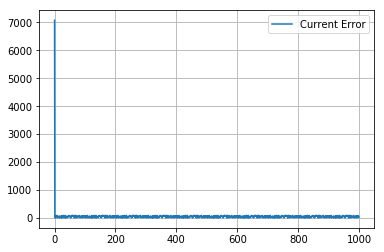

In [9]:
plt.plot(c.errors, label="Current Error")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
c.plot_weights()


[[1.10208433 4.37139773 2.7363398 ]]
[0.97127867]
(1, 3) (1,) 



[[1.16082227 1.05361316 2.97223616 3.01202588 3.43590787]
 [0.67446673 1.1819517  2.84608784 0.43905113 1.47456095]
 [4.93699089 2.29854492 2.68965645 4.96126816 3.07298124]]
[3.04915183]
(3, 5) (1,) 



[[2.43767532 2.00311921 4.07368771]
 [0.08513502 0.75812218 1.75095843]
 [2.83329367 2.92478562 1.29636585]
 [4.85255726 4.33657654 2.97088079]
 [4.5107133  1.25050225 4.42529828]]
[4.1431442]
(5, 3) (1,) 



[[-1208.59671925]
 [ -920.40154806]
 [-1114.57940889]]
[3.16596861]
(3, 1) (1,) 



